# Introduction to Matplotlib

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

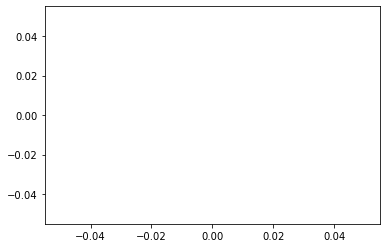

In [48]:
plt.plot();

<function matplotlib.pyplot.show(close=None, block=None)>

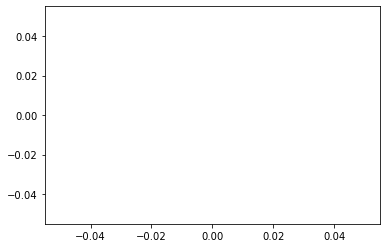

In [49]:
plt.plot()
plt.show

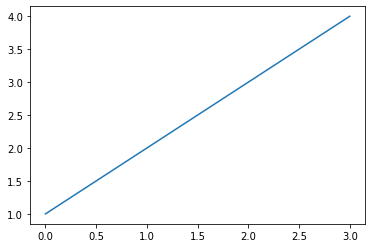

In [50]:
plt.plot([1, 2, 3, 4]);

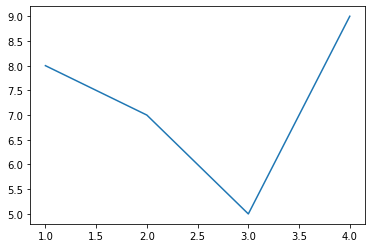

In [51]:
x = [1, 2, 3, 4]
y = [8, 7, 5, 9]
plt.plot(x, y)

<function matplotlib.pyplot.show(close=None, block=None)>

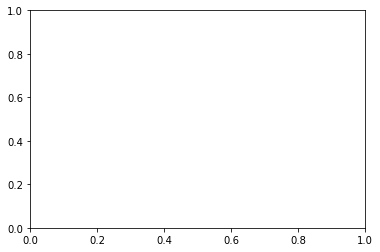

In [52]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show

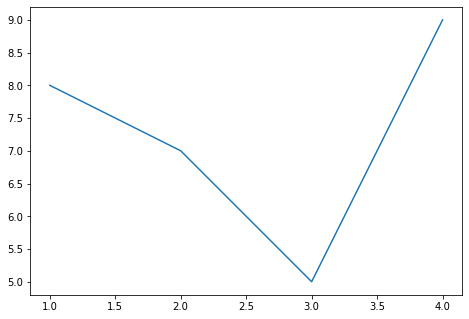

In [53]:
# 2nd method
fig = plt.figure() # creates a figure
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y)

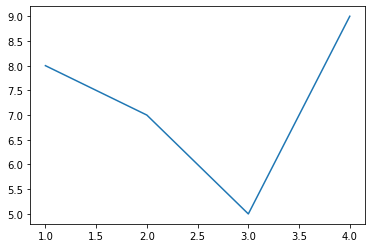

In [54]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x, y); # add data

## Matplotlib example workflow

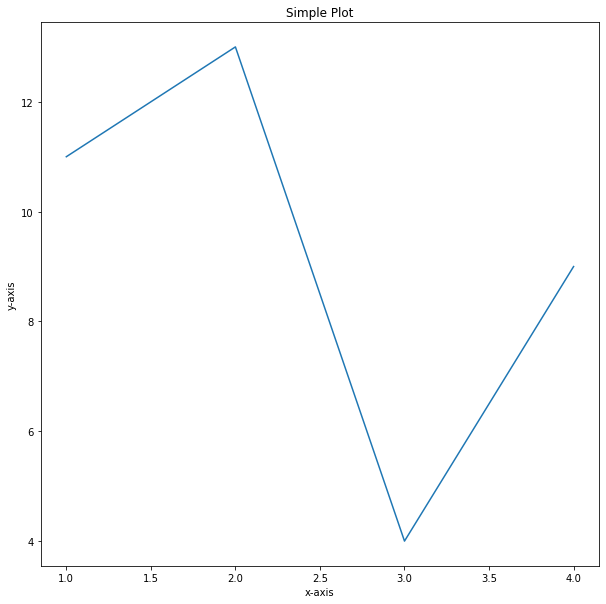

In [55]:
# 0. import matplotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 13, 4, 9]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Simple Plot",
       xlabel="x-axis",
       ylabel="y-axis")

# 5. Save and show (you save the whole figure)
fig.savefig("images/sample-plot.png")

## Making figures with NumPy arrays

We want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [56]:
# Create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

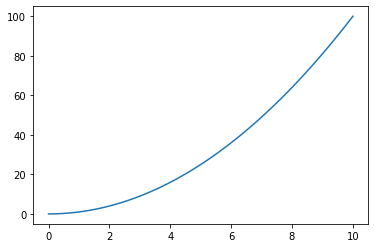

In [57]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2);

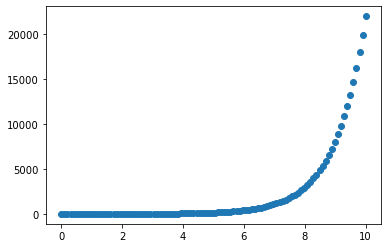

In [58]:
# Use same data to make a scatter
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

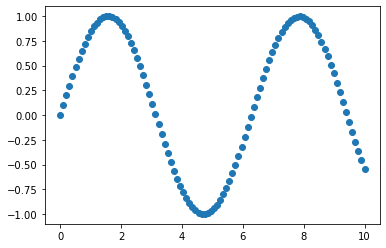

In [59]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

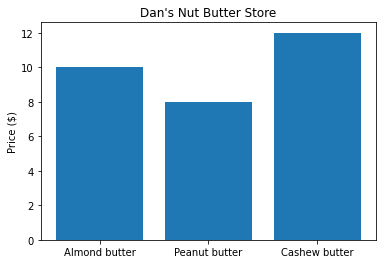

In [60]:
# Make a plot from dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values()) 
ax.set(title="Dan's Nut Butter Store", ylabel="Price ($)");

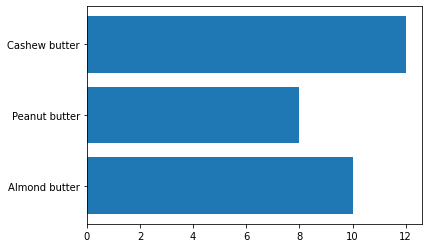

In [61]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

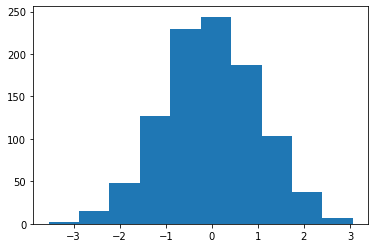

In [62]:
# Make some data for histograms and plot it
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

### Two options for subplots 

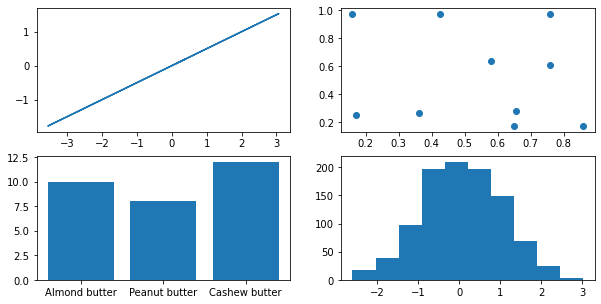

In [63]:
# Subplot option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(10, 5))
# Plot to each different axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

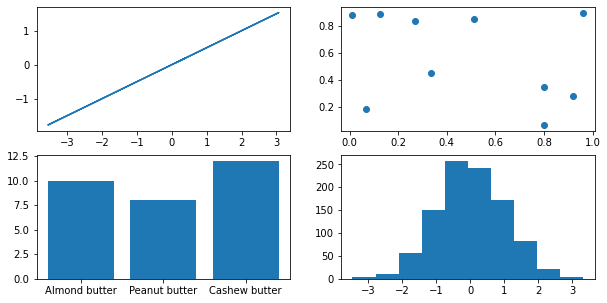

In [64]:
# Subplot option 2
fig, ax = plt.subplots(nrows=2,
                       ncols=2,
                       figsize=(10, 5))

# Plot to each different index
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

## Plotting from pandas DataFrame

In [65]:
# Make a dataframe
car_sales = pd.read_csv("../pandas/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [ ]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2022', periods=1000))

ts = ts.cumsum() 
ts.plot()
ts

In [ ]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')
car_sales["Price"]

In [ ]:
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]

In [ ]:
car_sales

In [ ]:
car_sales["Sale Date"] = pd.date_range("1/1/2022", periods=len(car_sales))
car_sales

In [ ]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

In [ ]:
# Let's plot the total sales
car_sales.plot(x="Sale Date", y="Total Sales");

In [ ]:
car_sales.plot(x="Odometer (KM)", y="Price", kind='scatter');

In [ ]:
# Bar graph

x = np.random.rand(10, 4)
x

# Turn into a dataframe
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

In [ ]:
df.plot.bar();

In [ ]:
df.plot(kind='bar');

In [ ]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

In [ ]:
# Histogram

car_sales["Odometer (KM)"].plot.hist()

In [ ]:
# Plots on different dataset 

heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

In [ ]:
# Create a histogram of age

heart_disease["age"].plot.hist();

In [ ]:
heart_disease.head()

In [ ]:
heart_disease.plot.hist(figsize=(10, 30), subplots=True);

### pyplot vs matplotlib OO method - which one to use?

* When plotting something quickly, okay to use the pyplot method
* When plotting something advanced, use the OO method

In [ ]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

In [ ]:
# Pyplot method
over_50.plot(kind="scatter",
             x='age',
             y='chol',
             c='target');

In [ ]:
# OO method mixed with pyplot method
fix, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind='scatter',
             x='age',
             y='chol',
             c='target',
             ax=ax);

In [ ]:
## OO method from skratch
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(x=over_50['age'],
                     y=over_50['chol'],
                     c=over_50['target'])

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");

# Add a legend
ax.legend(*scatter.legend_elements(), title='Target')

# Add a horizontal line
ax.axhline(over_50['chol'].mean(),
           linestyle='--');

In [ ]:
over_50.head()

In [ ]:
# Subplot of age, chol, thalach
fig, (ax0, ax1) = 

In [74]:
# Bar graph

x = np.random.rand(10, 4)
x

# Turn into a dataframe
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.391139,0.621657,0.872681,0.277818
1,0.440502,0.689652,0.539100,0.477899
2,0.693637,0.535514,0.368190,0.699032
3,0.994173,0.406828,0.774268,0.615983
4,0.195902,0.159045,0.568176,0.305961
5,0.111387,0.517411,0.671777,0.824276
6,0.832416,0.968989,0.222262,0.418130
7,0.690577,0.053988,0.147035,0.763031
8,0.622079,0.458153,0.253830,0.300192
9,0.986473,0.765914,0.653076,0.581680


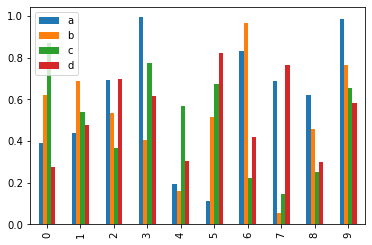

In [75]:
df.plot.bar();

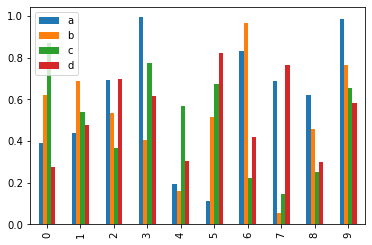

In [76]:
df.plot(kind='bar');

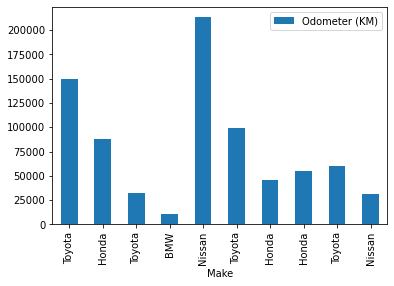

In [77]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

<AxesSubplot:ylabel='Frequency'>

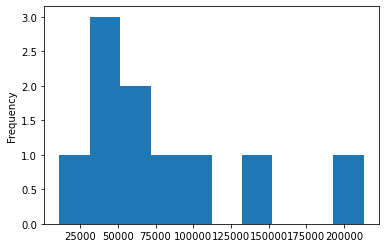

In [78]:
# Histogram

car_sales["Odometer (KM)"].plot.hist()

In [79]:
# Plots on different dataset 

heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


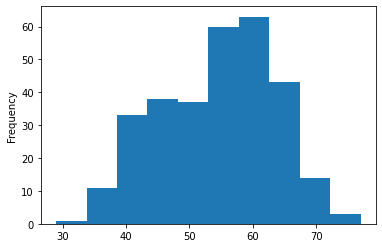

In [80]:
# Create a histogram of age

heart_disease["age"].plot.hist();

In [81]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


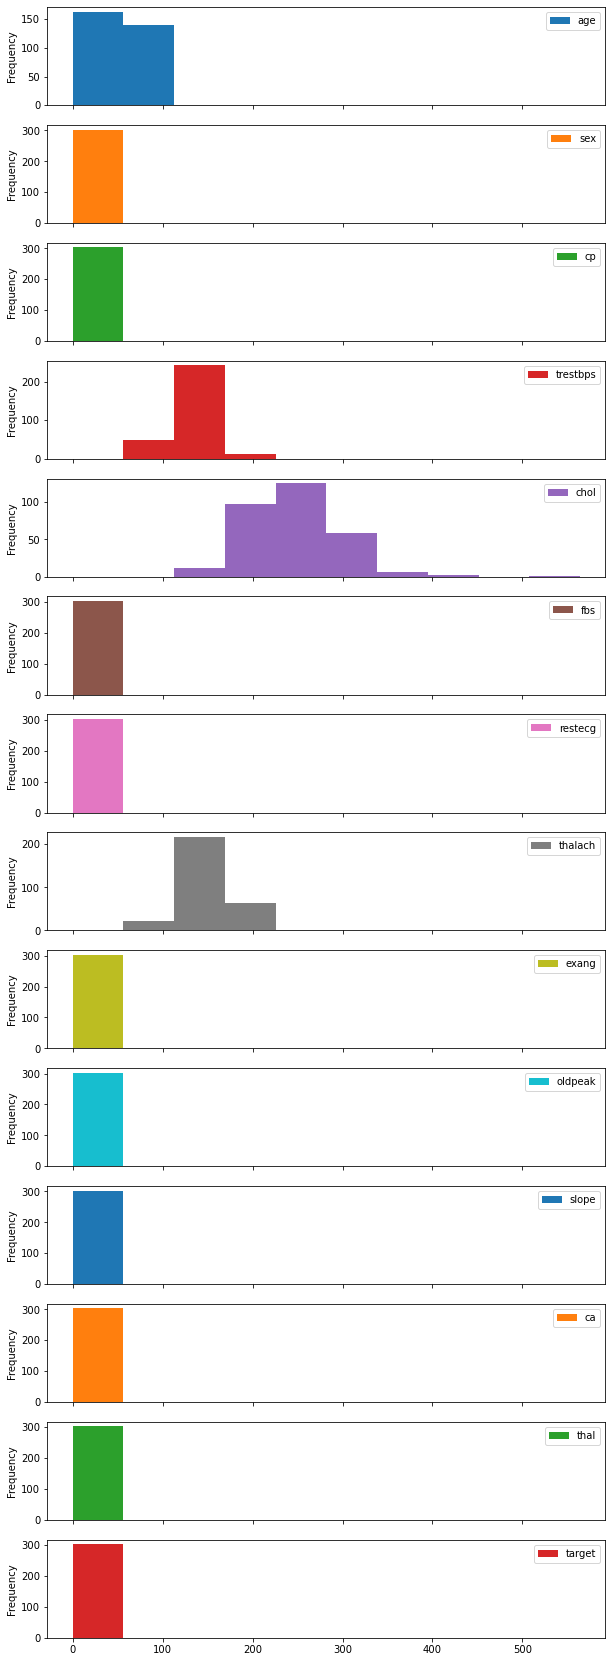

In [82]:
heart_disease.plot.hist(figsize=(10, 30), subplots=True);

### pyplot vs matplotlib OO method - which one to use?

* When plotting something quickly, okay to use the pyplot method
* When plotting something advanced, use the OO method

In [83]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


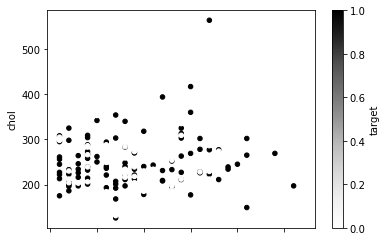

In [84]:
# Pyplot method
over_50.plot(kind="scatter",
             x='age',
             y='chol',
             c='target');

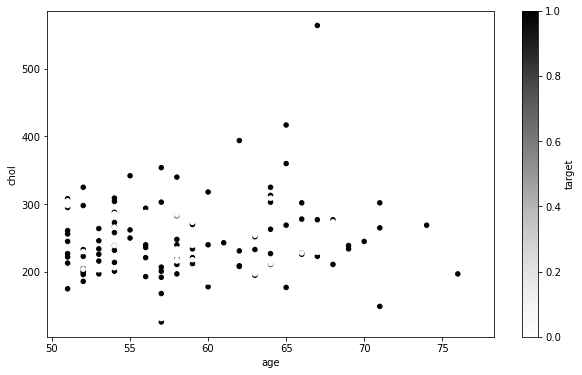

In [43]:
# OO method mixed with pyplot method
fix, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind='scatter',
             x='age',
             y='chol',
             c='target',
             ax=ax);

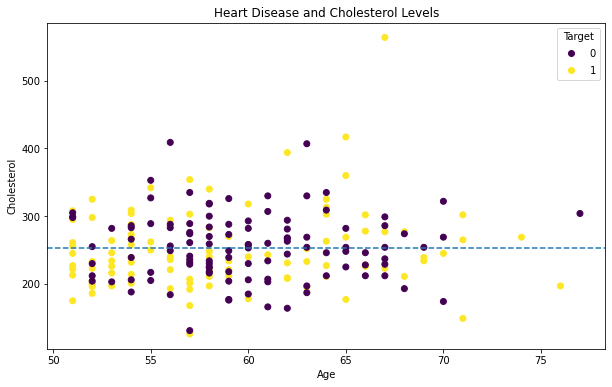

In [46]:
## OO method from skratch
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(x=over_50['age'],
                     y=over_50['chol'],
                     c=over_50['target'])

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");

# Add a legend
ax.legend(*scatter.legend_elements(), title='Target')

# Add a horizontal line
ax.axhline(over_50['chol'].mean(),
           linestyle='--');

In [85]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [ ]:
# Subplot of age, chol, thalach
fig, (ax0, ax1) = 